# Walmart Sales Insights Dashbaord

In [251]:
import sys
import os
old_stdout = sys.stdout # backup current stdout
sys.stdout = open(os.devnull, "w")

%run Walmart_Sales_Analysis_Working.ipynb

sys.stdout = old_stdout
pd.options.mode.chained_assignment = None # default='warn'

## Analyse Branch Performance

Branch With Most Revenue This Year


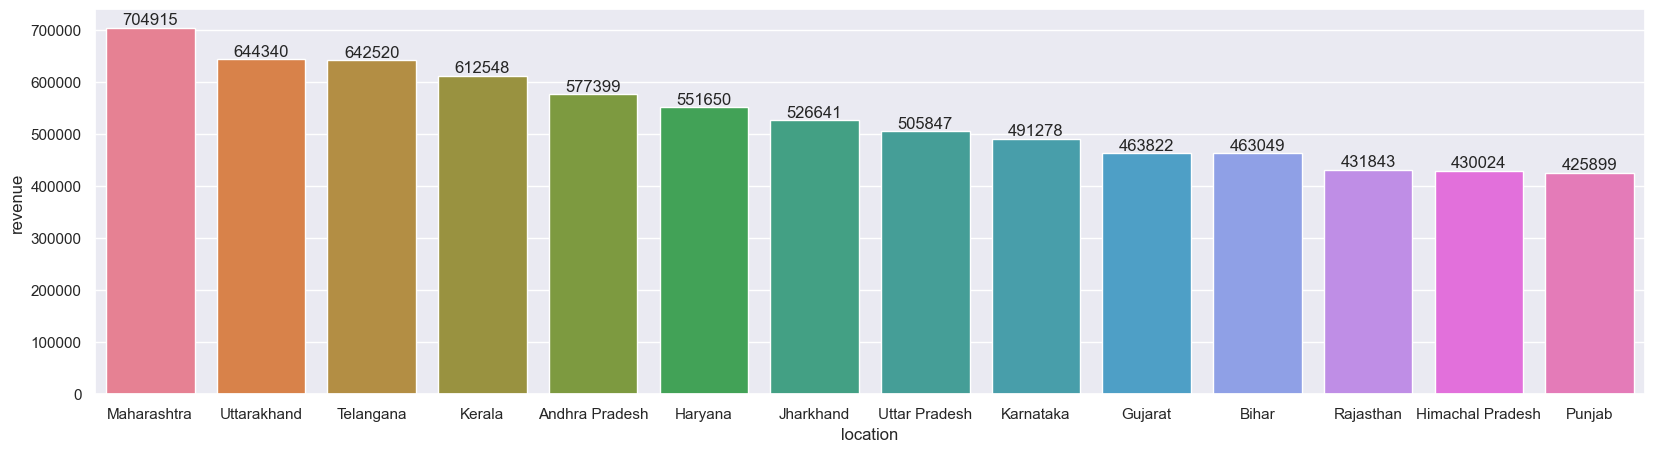

In [252]:
# Merge branch and sales data
allDetails = (order_details.merge(product_details, on='product_id', how='left')).merge(branch_details, on='branch_id', how='left').merge(user_details, on='user_id', how='left')
allDetails['revenue'] = allDetails['quantity'] * allDetails['price'] 

# group required fields
grpRevenue = allDetails.groupby(['location'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)
grpRevenue.reset_index(drop=True, inplace = True)

print('\033[1m' +  "Branch With Most Revenue This Year" + '\033[0m')

# display bar graphs
sns.set(rc={'figure.figsize':(20,5)})
res = sns.barplot(x = 'location',y = 'revenue',data = grpRevenue, hue = 'location',estimator = 'sum')
grpMonth

for bars in res.containers:
    res.bar_label(bars)

Top 3 Branches With Most Revenue Every Month


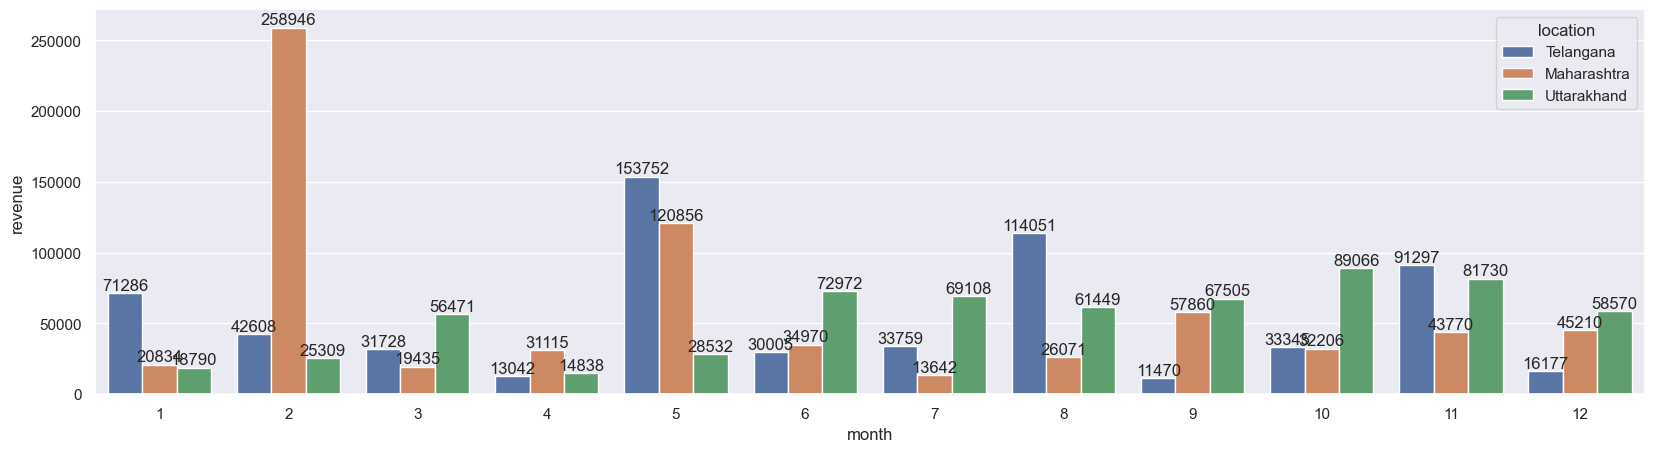

In [253]:
print('\033[1m' +  "Top 3 Branches With Most Revenue Every Month" + '\033[0m')

allDetails['month'] = pd.DatetimeIndex(allDetails['date']).month

# group required fields
grpMonth = allDetails.groupby(['month','location'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)
grpMonth = grpMonth[grpMonth['location'].isin(grpRevenue['location'].head(3))]
grpMonth.reset_index(drop=True, inplace = True)

# display bar graphs
sns.set(rc={'figure.figsize':(20,5)})
res = sns.barplot(x = 'month',y = 'revenue',data = grpMonth, hue = 'location',estimator = 'sum')

for bars in res.containers:
    res.bar_label(bars)


Branch With Most Footfall This Year 


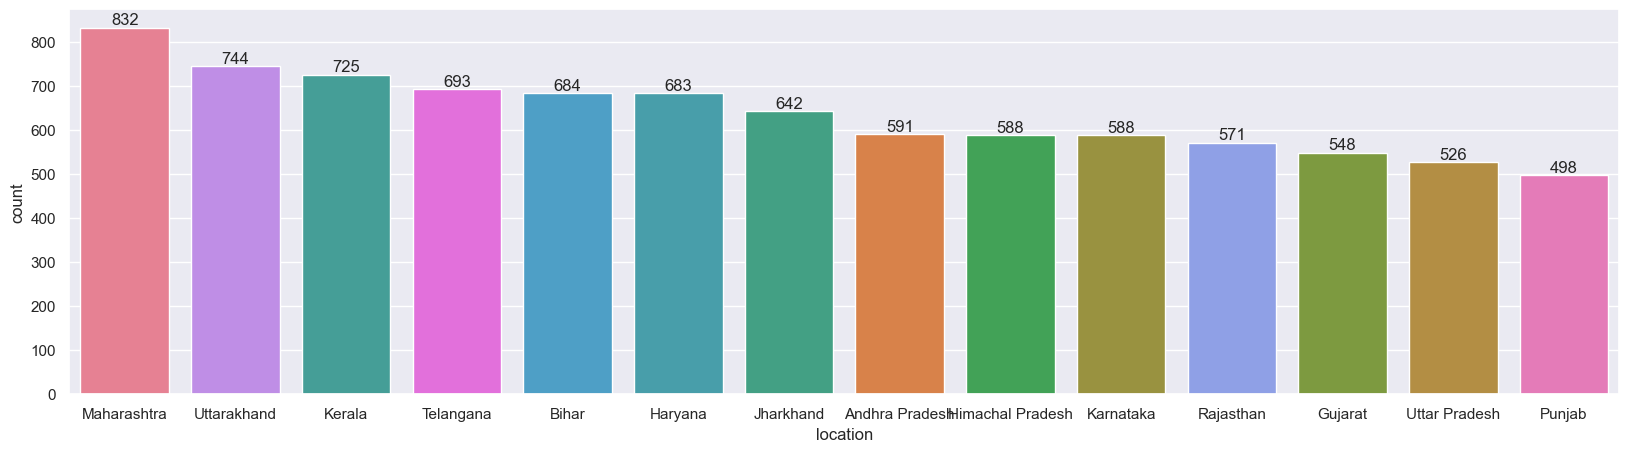

In [254]:
print('\033[1m' +  "Branch With Most Footfall This Year " + '\033[0m')
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'location',data = allDetails, order = allDetails['location'].value_counts().index, hue = 'location')

for bars in ax.containers:
    ax.bar_label(bars)

footfallorder = list(allDetails['location'].value_counts().index)




Top 3 Branches With Most Footfall Every Month


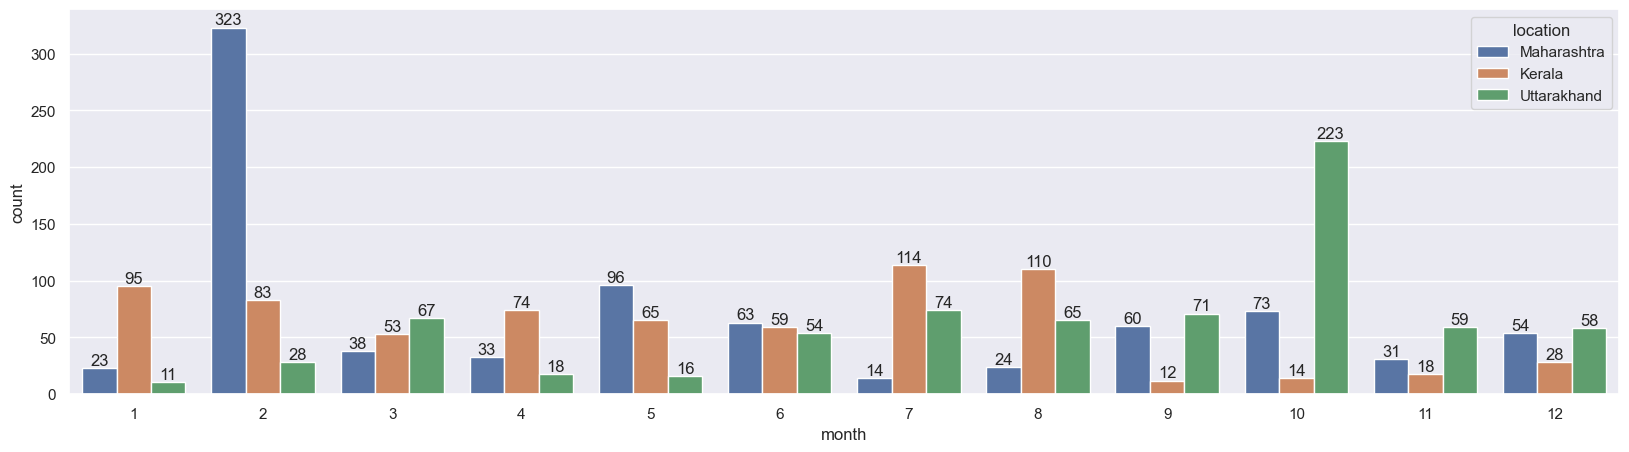

In [255]:
print('\033[1m' +  "Top 3 Branches With Most Footfall Every Month" + '\033[0m')

ax = sns.countplot(x = 'month',data = allDetails[allDetails['location'].isin(footfallorder[:3])], hue = 'location')

for bars in ax.containers:
    ax.bar_label(bars)


## Analyse Product Demand

Most Selling Products By Revenue


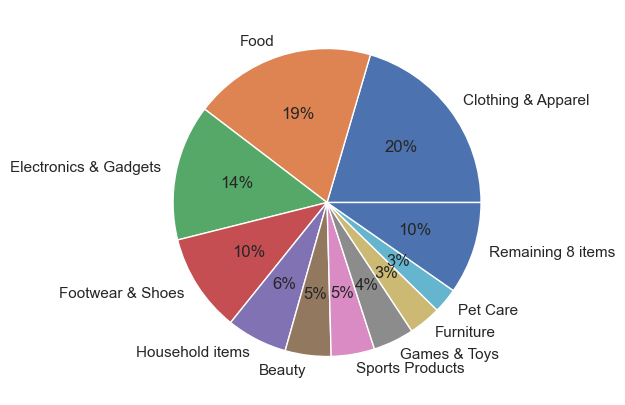

In [256]:
df = allDetails.groupby(['product_category'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)
df2 = df.head(10)
if len(df) > 10:
    text = "Remaining " + str(len(df)-len(df2)) +" items"
    df2.reset_index(drop =True, inplace = True)
    remSum = df['revenue'].sum() - df2['revenue'].sum()
    df2.loc[10] = [text, remSum]

print('\033[1m' +  "Most Selling Products By Revenue" + '\033[0m')
plt.pie(df2['revenue'], labels=df2['product_category'], autopct='%.0f%%')
plt.show() 

Most Selling Products By Quantity


<Axes: ylabel='count'>

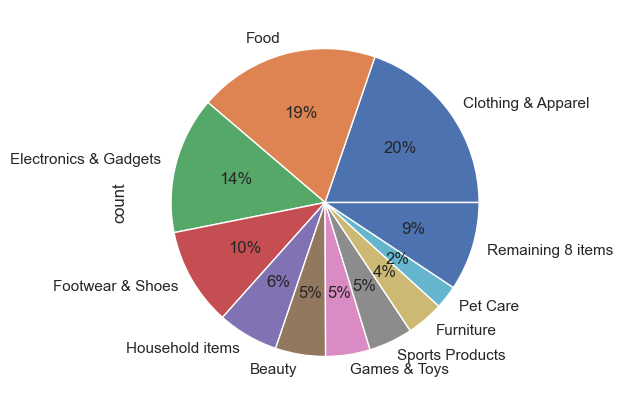

In [257]:
temp = allDetails.product_category.value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
    temp2['Remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
print('\033[1m' +  "Most Selling Products By Quantity" + '\033[0m')
temp2.plot(kind='pie',autopct='%.0f%%')

## Analyse User Preferences

In [258]:

print('\033[1m' +  "Top 3 Product Preference For Users Working In Various Sectors" + '\033[0m')

# group required fields
grpOccupation = allDetails.groupby(['occupation','product_category'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)
grpOccupation['rank'] = grpOccupation.groupby('occupation')['revenue'].rank(ascending = False)
grpOccupation = grpOccupation[grpOccupation['rank'] <= 3]
grpOccupation = grpOccupation[['occupation','product_category','revenue']]
grpOccupation.sort_values('occupation', inplace = True,ascending = True)
grpOccupation.reset_index(drop=True, inplace = True)

print(tabulate(grpOccupation, headers='keys', tablefmt='psql'))

Top 3 Product Preference For Users Working In Various Sectors
+----+-----------------+-----------------------+-----------+
|    | occupation      | product_category      |   revenue |
|----+-----------------+-----------------------+-----------|
|  0 | Agriculture     | Food                  |     43588 |
|  1 | Agriculture     | Clothing & Apparel    |     41731 |
|  2 | Agriculture     | Electronics & Gadgets |     45757 |
|  3 | Automobile      | Food                  |     83843 |
|  4 | Automobile      | Clothing & Apparel    |     84070 |
|  5 | Automobile      | Electronics & Gadgets |     60075 |
|  6 | Aviation        | Clothing & Apparel    |    176047 |
|  7 | Aviation        | Food                  |    154490 |
|  8 | Aviation        | Electronics & Gadgets |    128064 |
|  9 | Banking         | Electronics & Gadgets |    100691 |
| 10 | Banking         | Clothing & Apparel    |    135519 |
| 11 | Banking         | Food                  |    129100 |
| 12 | Chemical        

Do customer prefer buying more during a Sale?


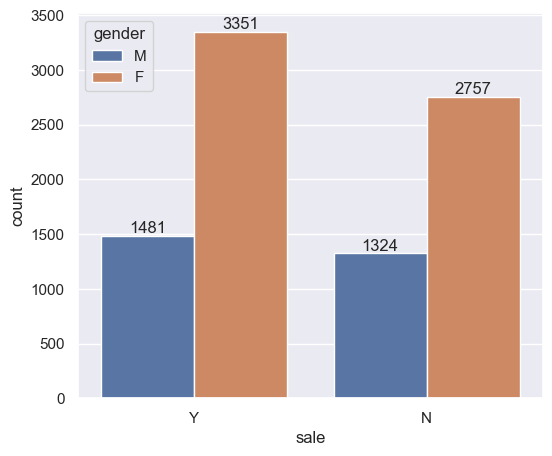

In [259]:
print('\033[1m' +  "Do customer prefer buying more during a Sale?" + '\033[0m')

sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x = 'sale',data = allDetails, hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

Analyze Customer As Per Their Marital Status?


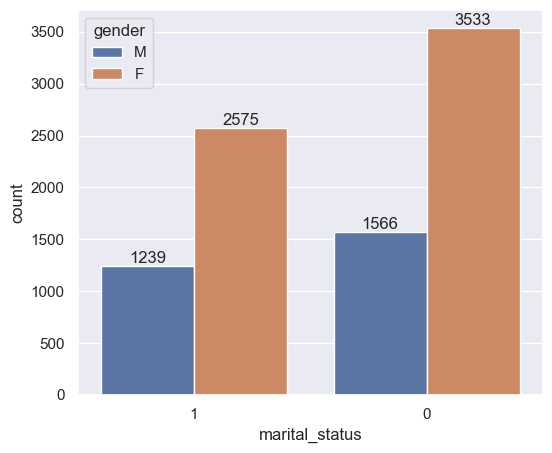

In [260]:
print('\033[1m' +  "Analyze Customer As Per Their Marital Status?" + '\033[0m')

sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(x = 'marital_status',data = allDetails, hue = 'gender')

for bars in ax.containers:
    ax.bar_label(bars)

Customers Spending Trend Based On Marital Status


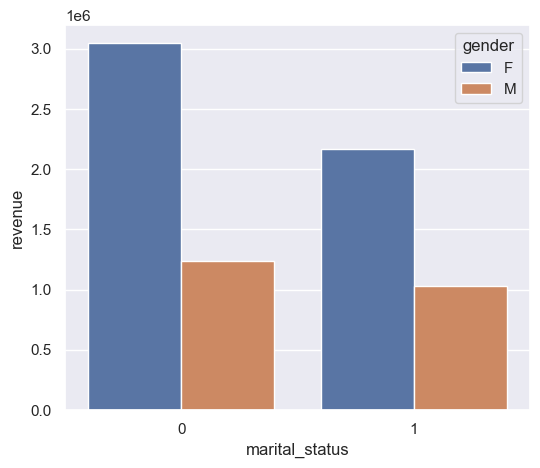

In [261]:
print('\033[1m' +  "Customers Spending Trend Based On Marital Status" + '\033[0m')

# group required fields
grpStatus = allDetails.groupby(['gender','marital_status'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
res1 = sns.barplot(x = 'marital_status',y = 'revenue',data = grpStatus, hue = 'gender')


In [262]:
grpOccupationRev = allDetails.groupby(['occupation'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)
grpOccupationRev.reset_index(drop = True, inplace = True)

grpSale = allDetails.groupby(['sale'], as_index = False)['revenue'].sum().sort_values(by = 'revenue', ascending = False)


In [264]:
print('\033[1m' + '\033[1;37;40m' +  "---------------------Conclusion---------------------" + '\033[0m')
print(f'''
From the above analysis, we can conclude that, 
1. The most revenue generating Walmart branch is {grpRevenue['location'][0]} followed by {grpRevenue['location'][1]} & {grpRevenue['location'][2]} respectively.
    For these three branches, the best performing month was {datetime.date(1900, grpMonth['month'][0], 1).strftime('%B')}. 
2. The Branch to receive most footfall is {footfallorder[0]}, followed by {footfallorder[1]} & {footfallorder[2]}.
    The most footfall observed was in {datetime.date(1900, grpMonth['month'][0], 1).strftime('%B')} month. 
3. The best performing Product in terms of numbers of items sold as well as most revenue generating are {df2['product_category'][0]} , {df2['product_category'][1]}
    and {df2['product_category'][2]}
4. Most of the customer visiting the Walmart store are employed in {grpOccupationRev['occupation'][0]} , {grpOccupationRev['occupation'][1]} and {grpOccupationRev['occupation'][2]} sector.
5. Top purchasers as well as store visitors are {'Unmarried' if grpStatus['marital_status'][0] == '0'  else "Married"} {'Female' if grpStatus['gender'][0] == 'F' else 'Male'}. 

Action Items: 
1. As most of the store engagement is coming from Unmarried Females, the store can focus more on promoting products under category of beauty, Footwear 
    and shoes and other items which may appeal to this target audience.
2. The store able to do {(((grpSale['revenue'][1]/grpSale['revenue'][0])-1)):.2%} of more revenue during Sale period. The store should focus on promoting sale information among its customer.
3. With {(grpRevenue['revenue'][0]/grpRevenue['revenue'].sum()):.2%} of total revenue coming from its top store in {grpRevenue['location'][0]} and lowest revenue from {grpRevenue['location'][13]} with {(grpRevenue['revenue'][13]/grpRevenue['revenue'].sum()):.2%} of revenue, Walmart can 
    focus more on promoting all stores equally, diversifying its revenue stream.

''')

---------------------Conclusion---------------------

From the above analysis, we can conclude that, 
1. The most revenue generating Walmart branch is Maharashtra followed by Uttarakhand & Telangana respectively.
    For these three branches, the best performing month was February. 
2. The Branch to receive most footfall is Maharashtra, followed by Uttarakhand & Kerala.
    The most footfall observed was in February month. 
3. The best performing Product in terms of numbers of items sold as well as most revenue generating are Clothing & Apparel , Food
    and Electronics & Gadgets
4. Most of the customer visiting the Walmart store are employed in IT Sector , Healthcare and Aviation sector.
5. Top purchasers as well as store visitors are Unmarried Female. 

Action Items: 
1. As most of the store engagement is coming from Unmarried Females, the store can focus more on promoting products under category of beauty, Footwear 
    and shoes and other items which may appeal to this target audi